In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import cassiopeia as cas
import pandas as pd
import numpy as np
import sys

sys.path.append('src/')
from benchmark_modules import *
from single_regime_boxplots import single_regime_boxplots

# Base parameters, no fitness
in_folder = "/data/yosef2/users/richardz/projects/CassiopeiaV2-Reproducibility/trees/exponential_plus_c/400cells/no_fit/char40/"
out_folder = "./data/"
plots_folder = "./plots/"

# Alternative Data. Must re-implement get_cm() or use the class GroundTruthCMBM()
in_folder_2 = "/home/eecs/ivalexander13/datadir/simulation_data/trees4/exponential_plus_c/no_fit/cells400/mutrate0.5/char40/states100/"
in_folder_3 = "/home/eecs/ivalexander13/datadir/simulation_data/trees4/exponential_plus_c/no_fit/cells2000/mutrate0.5/char40/states100/"


# NJ Plain

In [3]:
nj_plain = BenchmarkModule(
    test_name = "nj_plain",
    gt_trees_dir = in_folder,
    numtrees = 50,
    out_basefolder = out_folder,
)

nj_plain.reconstruct(overwrite=False)
nj_plain.evaluate(overwrite=False)

Skipping reconstruction 49: 100%|██████████| 50/50 [00:00<00:00, 535.45it/s]


# NJ Vanilla; 400 cells, no missing data, real time


In [16]:
nj_plain_2 = GroundTruthCMBM(
    test_name = "nj_plain_2",
    gt_trees_dir = in_folder_2,
    numtrees = 50,
    out_basefolder = out_folder,
)

nj_plain_2.reconstruct(overwrite=True)
nj_plain_2.evaluate(overwrite=True)

Evaluating tree 49: 100%|██████████| 50/50 [05:36<00:00,  6.73s/it]


# SNJ Plain

In [35]:
snj_plain = BenchmarkModule(
    test_name = "snj_plain",
    solver=cas.solver.SpectralNeighborJoiningSolver(add_root = True),
    numtrees=50,
    gt_trees_dir = in_folder,
    out_basefolder = out_folder,
)

snj_plain.reconstruct(overwrite=False, collapse_mutationless_edges=True)
snj_plain.evaluate(overwrite=False)

Evaluating tree 49: 100%|██████████| 50/50 [05:24<00:00,  6.49s/it]


# NJ with Inverse WHD; 400 cells, with missing data, real time

In [17]:
nj_iwhd_1 = IWHDBenchmarkModule(
    test_name = "nj_iwhd_1",
    gt_trees_dir = in_folder,
    numtrees=50,
    out_basefolder = out_folder,
)

nj_iwhd_1.reconstruct(overwrite=False)
nj_iwhd_1.evaluate(overwrite=False)

Evaluating tree 49: 100%|██████████| 50/50 [05:23<00:00,  6.47s/it]


# NJ with Inverse WHD; 400 cells, no missing data, real time

Make sure to run the IWHDBenchmarkModule cell above

In [31]:
nj_iwhd_2 = IWHDBenchmarkModule(
    test_name = "nj_iwhd_2",
    gt_trees_dir = in_folder_2,
    numtrees=50,
    out_basefolder = out_folder,
)

nj_iwhd_2.reconstruct(overwrite=True)
nj_iwhd_2.evaluate(overwrite=True)

Evaluating tree 49: 100%|██████████| 50/50 [05:24<00:00,  6.50s/it]


# NJ with Inverse WHD; 2000 cells, no missing data, real time

In [ ]:
in_folder_iwhd_3 = "/home/eecs/ivalexander13/datadir/simulation_data/trees4/exponential_plus_c/no_fit/cells2000/mutrate0.5/char40/states100/"

nj_iwhd_3 = IWHDBenchmarkModule(
    test_name = "nj_iwhd_3",
    gt_trees_dir = in_folder_2,
    numtrees=50,
    out_basefolder = out_folder,
)

nj_iwhd_3.reconstruct(overwrite=False)
nj_iwhd_3.evaluate(overwrite=False)

# NJ with True Distance

In [34]:
nj_true_dist = TrueDistBM(
    test_name = "nj_true_dist",
    solver=cas.solver.SpectralNeighborJoiningSolver(add_root = True),
    numtrees=50,
    gt_trees_dir = in_folder,
    out_basefolder = out_folder,
)

nj_true_dist.reconstruct(overwrite=True, collapse_mutationless_edges=False)
nj_true_dist.evaluate(overwrite=True)

Evaluating tree 49: 100%|██████████| 50/50 [05:29<00:00,  6.59s/it]


# SNJ with Exp True Distance

In [33]:
snj_true_dist = TrueDistBM(
    test_name = "snj_true_dist",
    solver=cas.solver.SpectralNeighborJoiningSolver(add_root = True),
    gt_trees_dir = in_folder,
    numtrees=50,
    out_basefolder = out_folder,
)

snj_true_dist.reconstruct(overwrite=True, collapse_mutationless_edges=False)
snj_true_dist.evaluate(overwrite=True)

Evaluating tree 49: 100%|██████████| 50/50 [05:25<00:00,  6.51s/it]


# NJ Yaffe

In [ ]:
nj_yaffe = NJYaffeBM(
    test_name = "nj_yaffe",
    numtrees=50,
    gt_trees_dir = in_folder,
    out_basefolder = out_folder,
)

nj_yaffe.reconstruct(overwrite=True, collapse_mutationless_edges=True)
nj_yaffe.evaluate(overwrite=True)

# SNJ Yaffe

In [ ]:
snj_yaffe = SNJYaffeBM(
    test_name = "snj_yaffe",
    numtrees=50,
    gt_trees_dir = in_folder,
    out_basefolder = out_folder,
)

snj_yaffe.reconstruct(overwrite=True)
snj_yaffe.evaluate(overwrite=True)

# STDR Yaffe

In [ ]:
stdr_yaffe = STDRYaffeBM(
    test_name = "stdr_yaffe",
    numtrees=50,
    gt_trees_dir = in_folder,
    out_basefolder = out_folder,
)

stdr_yaffe.reconstruct(overwrite=True, collapse_mutationless_edges=True)
stdr_yaffe.evaluate(overwrite=True)

# Plotting

<Figure size 432x288 with 0 Axes>

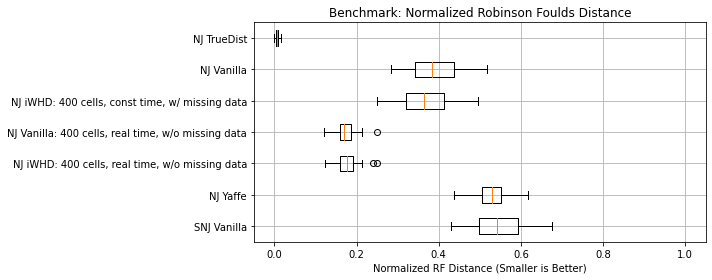

<Figure size 432x288 with 0 Axes>

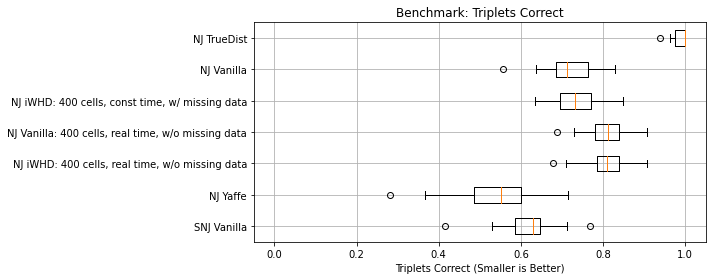

('./plots/RF.benchmark.png', './plots/triplets.benchmark.png')

In [19]:
# Params
stubs2names = [
    ("nj_true_dist", "NJ TrueDist"),
    ("nj_plain", "NJ Vanilla"),
    ("nj_iwhd_1", "NJ iWHD: 400 cells, const time, w/ missing data"),
    ("nj_plain_2", "NJ Vanilla: 400 cells, real time, w/o missing data"),
    ("nj_iwhd_2", "NJ iWHD: 400 cells, real time, w/o missing data"),
    # ("nj_iwhd_3", "NJ iWHD: 2000 cells, real time, w/o missing data"),
    ("nj_yaffe", "NJ Yaffe"),
    ("snj_plain", "SNJ Vanilla"),
    # ("snj_true_dist", "SNJ TrueDist"),
    # ("snj_yaffe", "SNJ Yaffe"),
    # ("stdr_yaffe", "STDR Yaffe"),
]

single_regime_boxplots(stubs2names, out_folder=out_folder, plots_folder=plots_folder, plot_file_suffix="benchmark")